

*   항목 추가
*   항목 추가


## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-02.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


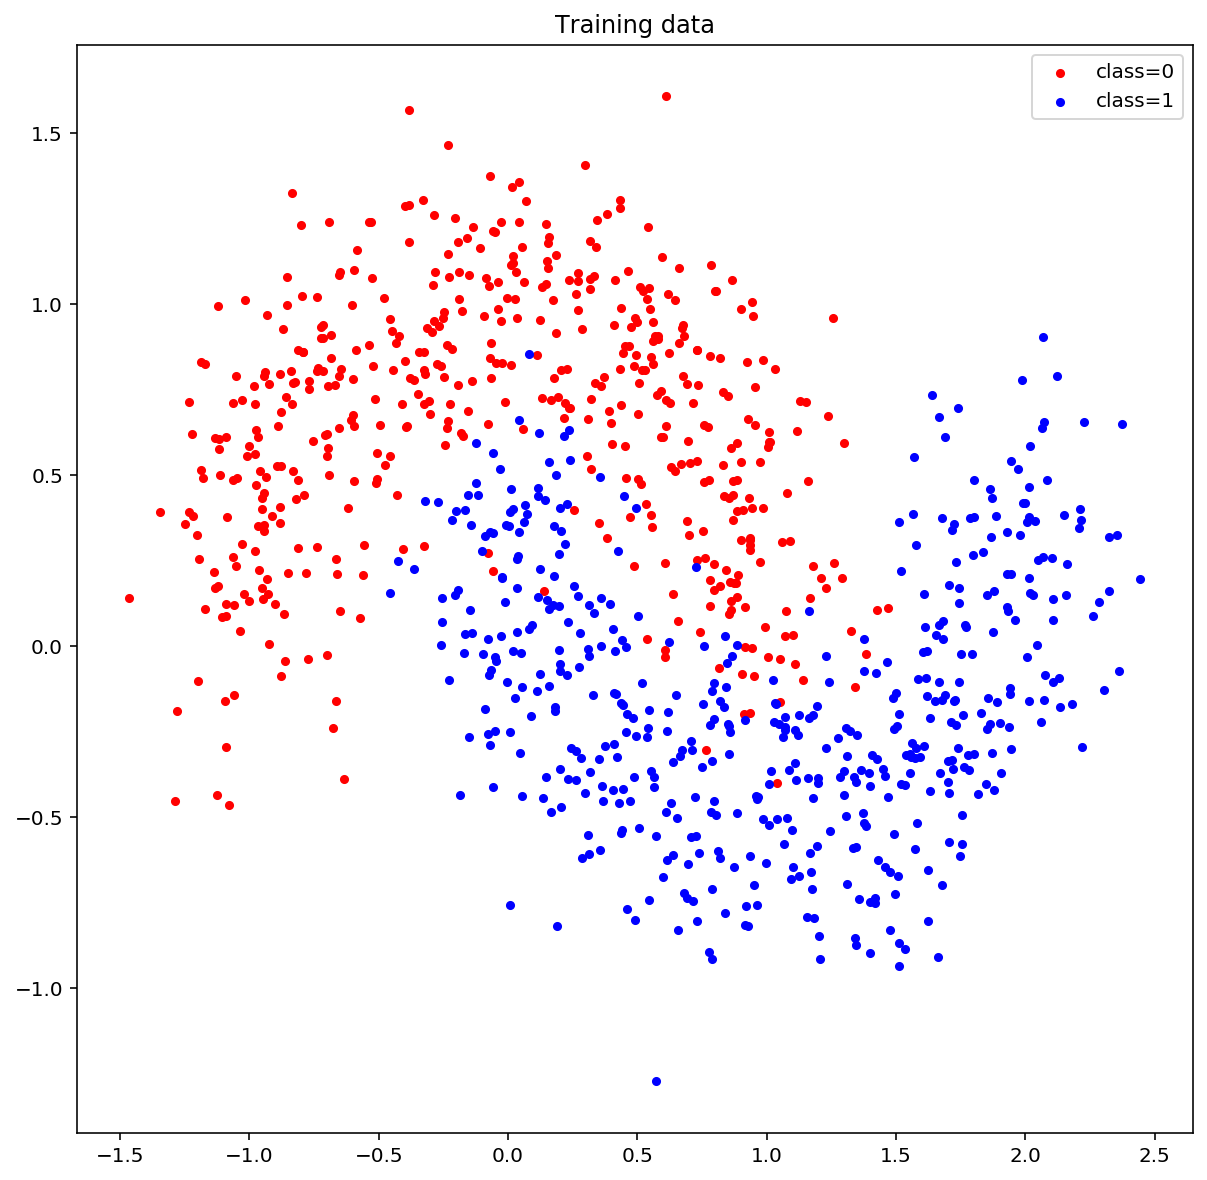

In [3]:
# import data with numpy
data = np.loadtxt('dataset-b.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (data[:,2]==0)  # index of class0
idx_class1 = (data[:,2]==1)  # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0] , x2[idx_class0] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1] , x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Define a logistic regression loss function and its gradient
<hr>

In [4]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = np.mean((-y.T).dot(np.log(y_pred)) - (1 - y).T.dot(np.log(1 - y_pred + 1e-5)))
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = X.T.dot(y_pred - y) * 2 / n
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X, w) # linear predicition function   
        grad_f =  grad_loss(y_pred, y, X) # gradient of the loss  
        w =  w - (tau * grad_f) # update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred, y) # save the current loss value 
        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

(1000, 1)
Time= 7.807326078414917
113.32481670003745
[[  5.07914971]
 [  2.50789565]
 [ -9.54234927]
 [-15.1137438 ]
 [  3.22612638]
 [ -2.72994928]
 [  6.2486996 ]
 [ -5.49061085]
 [  5.72735203]
 [ -4.61658606]]


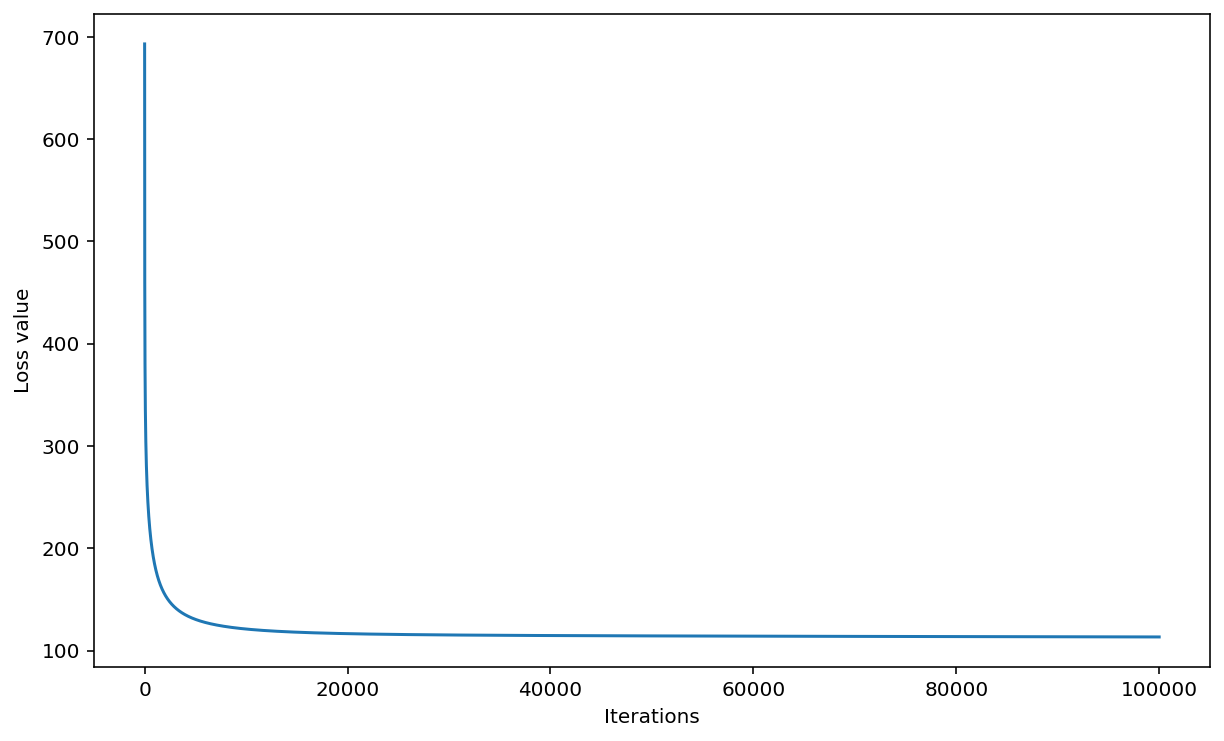

In [19]:
# construct the data matrix X, and label vector y
n = data.shape[0]
X = np.ones((n, 10))
y = data[:, 2][:, None]# label 
print(y.shape)

#prediction
X[:,1] = x1
X[:,2] = x2
X[:,3] = x1**2
X[:,4] = x2**2
X[:,5] = x1**2 * x2**2
X[:,6] = x1**3 * x2**2
X[:,7] = x1**2 * x2**3
X[:,8] = x1**4
X[:,9] = x2**4

# run gradient descent algorithm
start = time.time()
w_init = np.array([0,0,0,0,0,0,0,0,0,0])[:,None]
tau = 10e-2; max_iter = 100000
w, L_iters = grad_desc(X, y, w_init, tau, max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decision boundary
<hr>

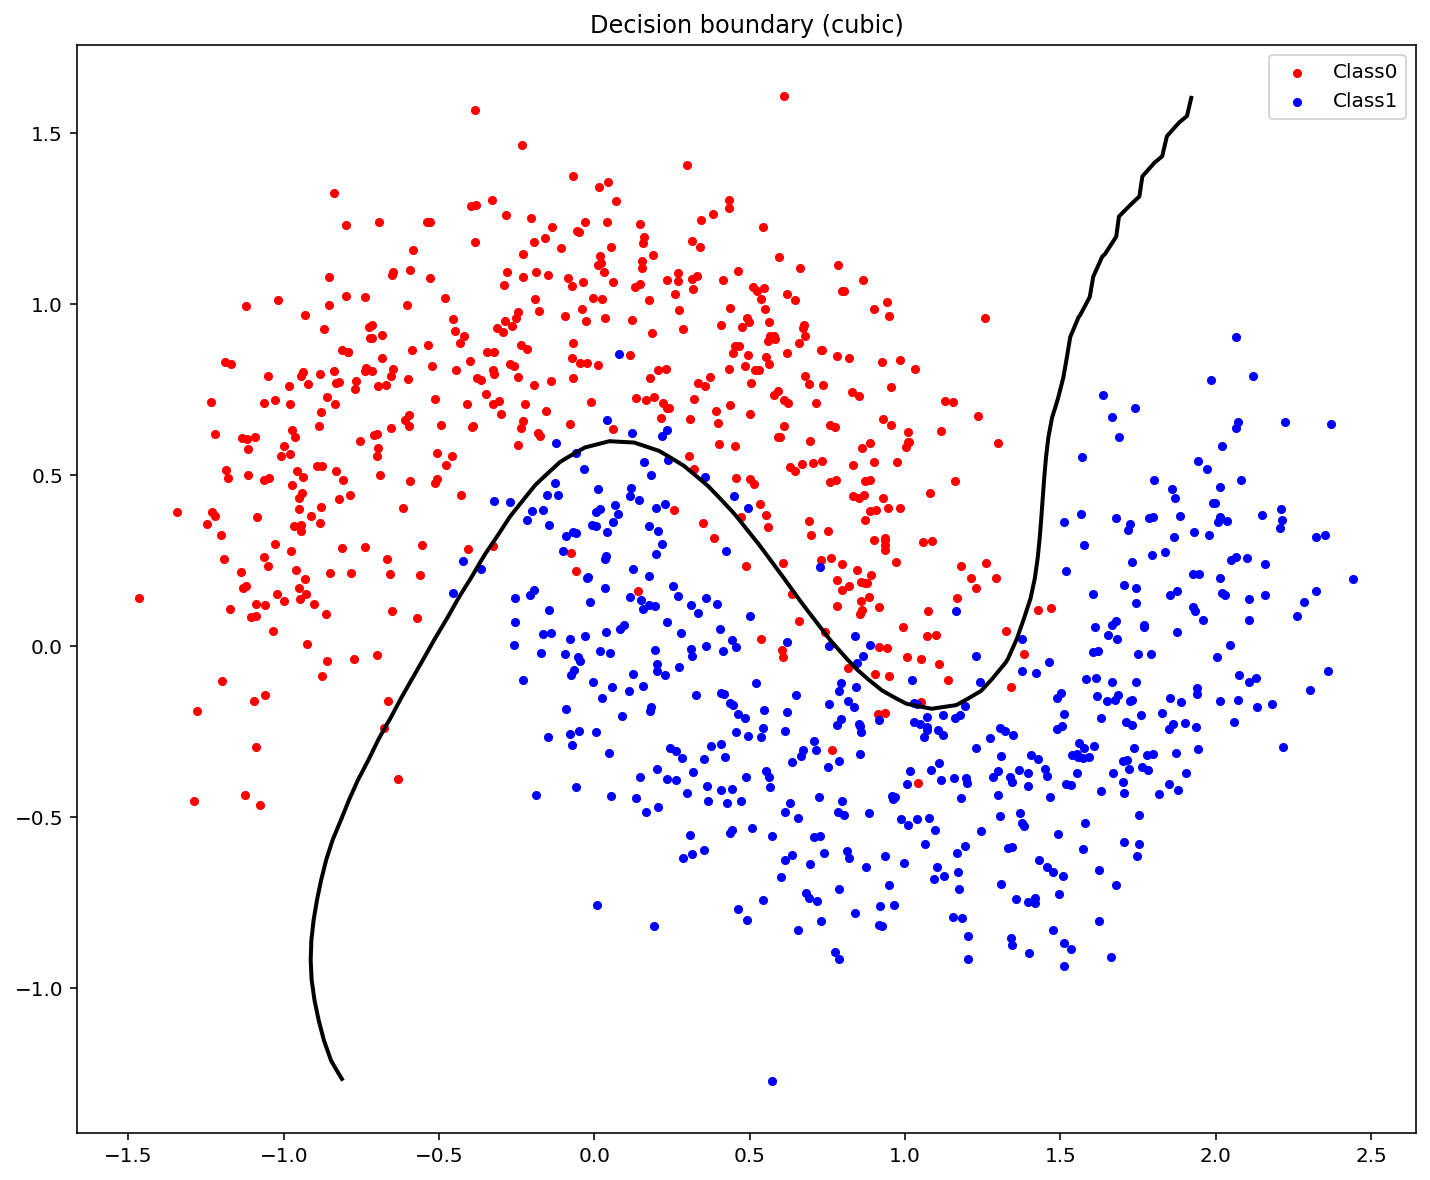

In [21]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max()# min and max of grade 1
x2_min, x2_max = x2.min(), x2.max()# min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones((xx1.shape[0]**2, 10))

x1_ = xx1.reshape(-1)
x2_ = xx2.reshape(-1)

X2[:,1] = x1_
X2[:,2] = x2_
X2[:,3] = x1_**2
X2[:,4] = x2_**2
X2[:,5] = x1_**2 * x2_**2
X2[:,6] = x1_**3 * x2_**2
X2[:,7] = x1_**2 * x2_**3
X2[:,8] = x1_**4
X2[:,9] = x2_**4

p = f_pred(X2, w)
p = p.reshape(xx1.shape[0], xx1.shape[1])

# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1[idx_class0],x2[idx_class0], s=50, c='r', marker='.', label='Class0') 
plt.scatter(x1[idx_class1],x2[idx_class1], s=50, c='b', marker='.', label='Class1')
plt.contour(xx1, xx2, p, levels=1, linewidths=2, colors='k')
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 5. Plot the probability map
<hr>

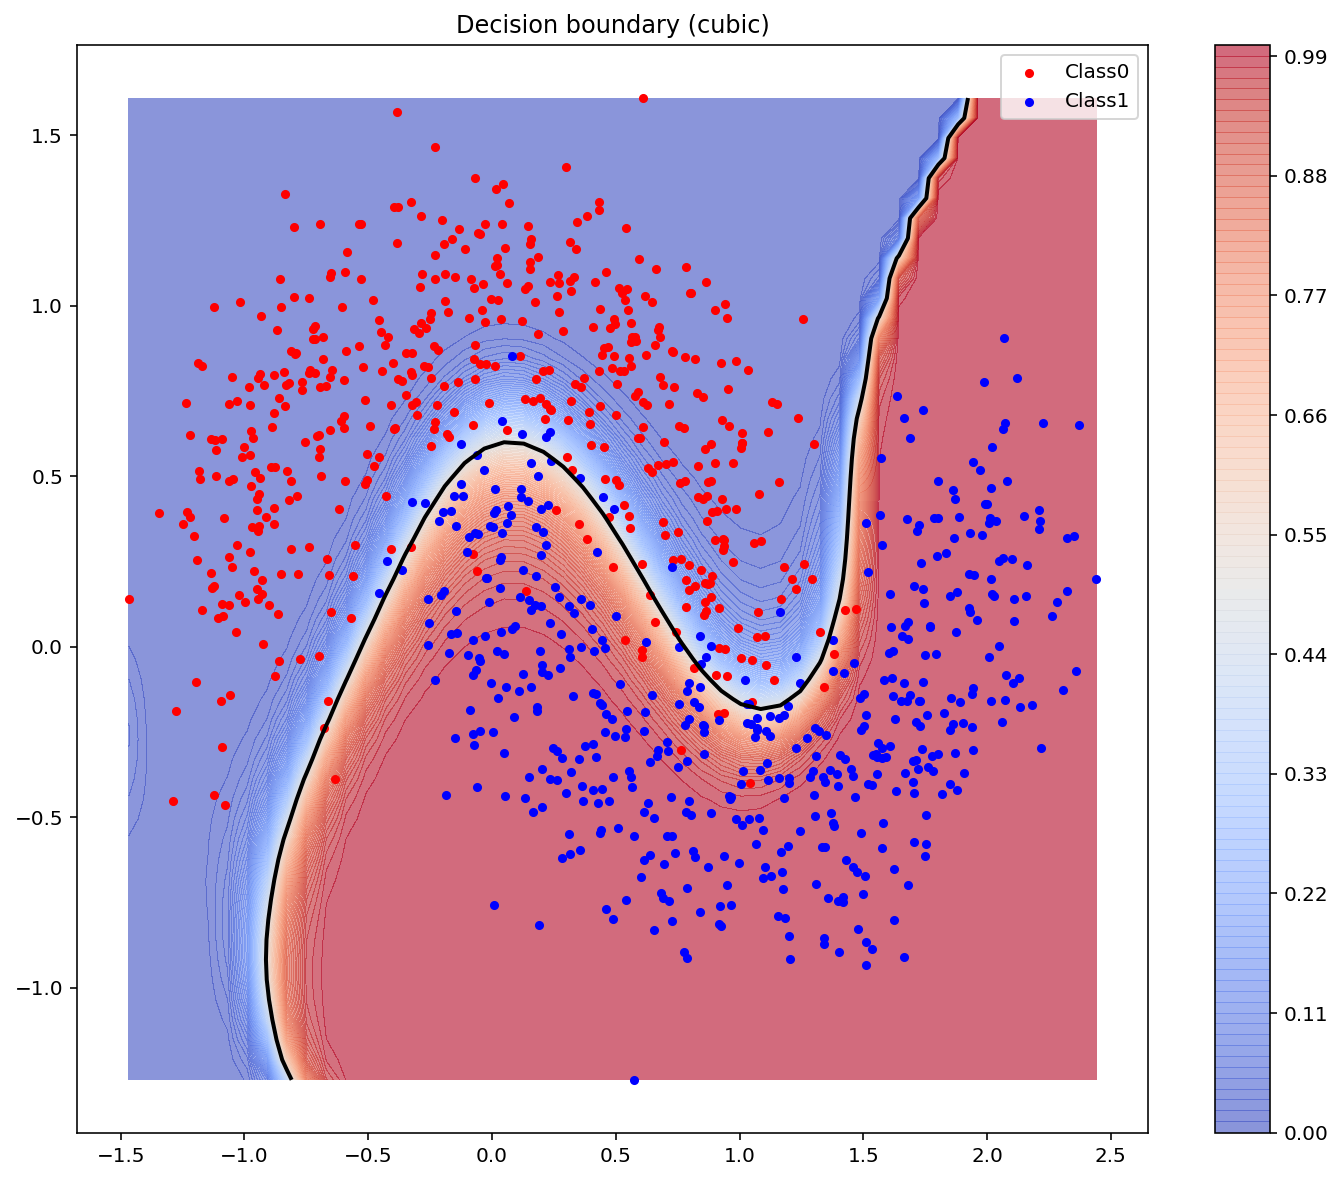

In [22]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max()# min and max of grade 1
x2_min, x2_max = x2.min(), x2.max()# min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

X2 = np.ones((xx1.shape[0]**2, 10))

x1_ = xx1.reshape(-1)
x2_ = xx2.reshape(-1)

X2[:,1] = x1_
X2[:,2] = x2_
X2[:,3] = x1_**2
X2[:,4] = x2_**2
X2[:,5] = x1_**2 * x2_**2
X2[:,6] = x1_**3 * x2_**2
X2[:,7] = x1_**2 * x2_**3
X2[:,8] = x1_**4
X2[:,9] = x2_**4

p_ = f_pred(X2, w )
p_ = p_.reshape(xx1.shape[0], xx1.shape[1] )

# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p_,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx_class0],x2[idx_class0], s=50, c='r', marker='.', label='Class0') 
plt.scatter(x1[idx_class1],x2[idx_class1], s=50, c='b', marker='.', label='Class1')
plt.contour(xx1,xx2,p_,levels=1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [23]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 = data[:, 0] # feature 1
x2 = data[:, 1]  # feature 2
idx_class0 = (data[:, 2] == 0)  # index of class0
idx_class1 = (data[:, 2] == 1)  # index of class1

X2 = X
p = f_pred(X2, w)

idx_class1_pred = (p[:,0] >=0.5)

#print(idx_class1_label)
#print(idx_class1_pred)

idx_wrong = (idx_class1!=idx_class1_pred)


#print(np.sum(idx_wrong))
print("total number of data = ", n)
print('total number of correctly classified data = ', (n - np.sum(idx_wrong)))
print('accuracy(%) = ', ((n-np.sum(idx_wrong))/n*100) )

total number of data =  1000
total number of correctly classified data =  953
accuracy(%) =  95.3


## Output using the dataset (dataset-noise-02.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

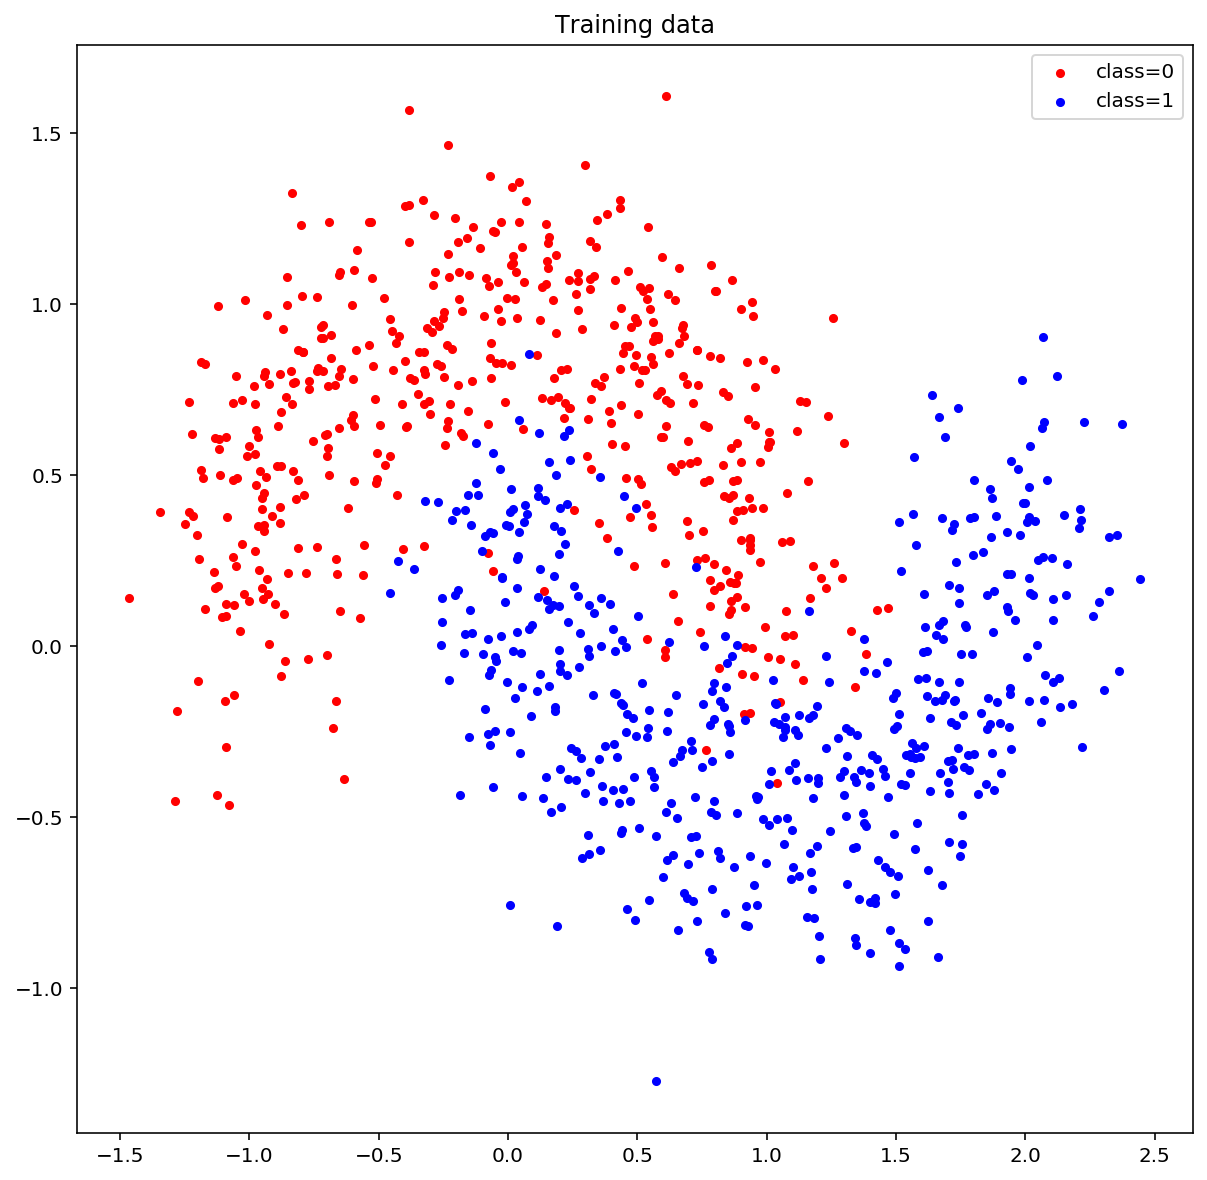

In [24]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0] , x2[idx_class0] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1] , x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

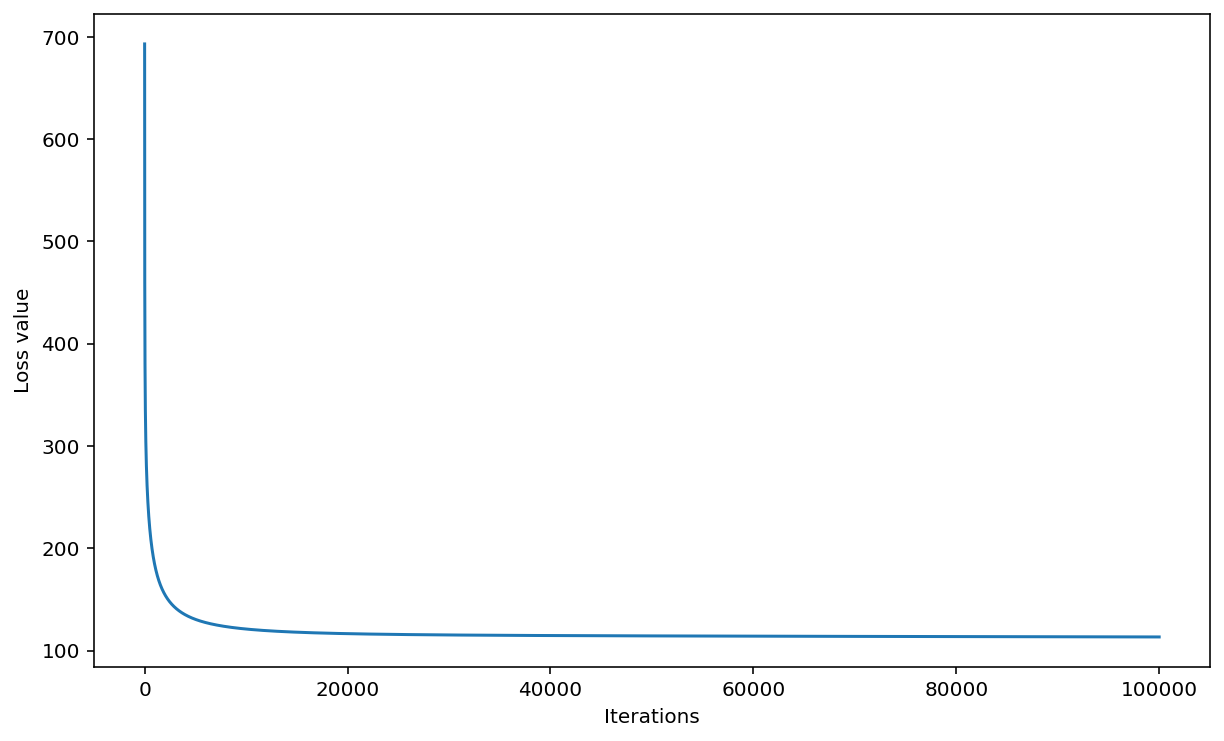

In [25]:

# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

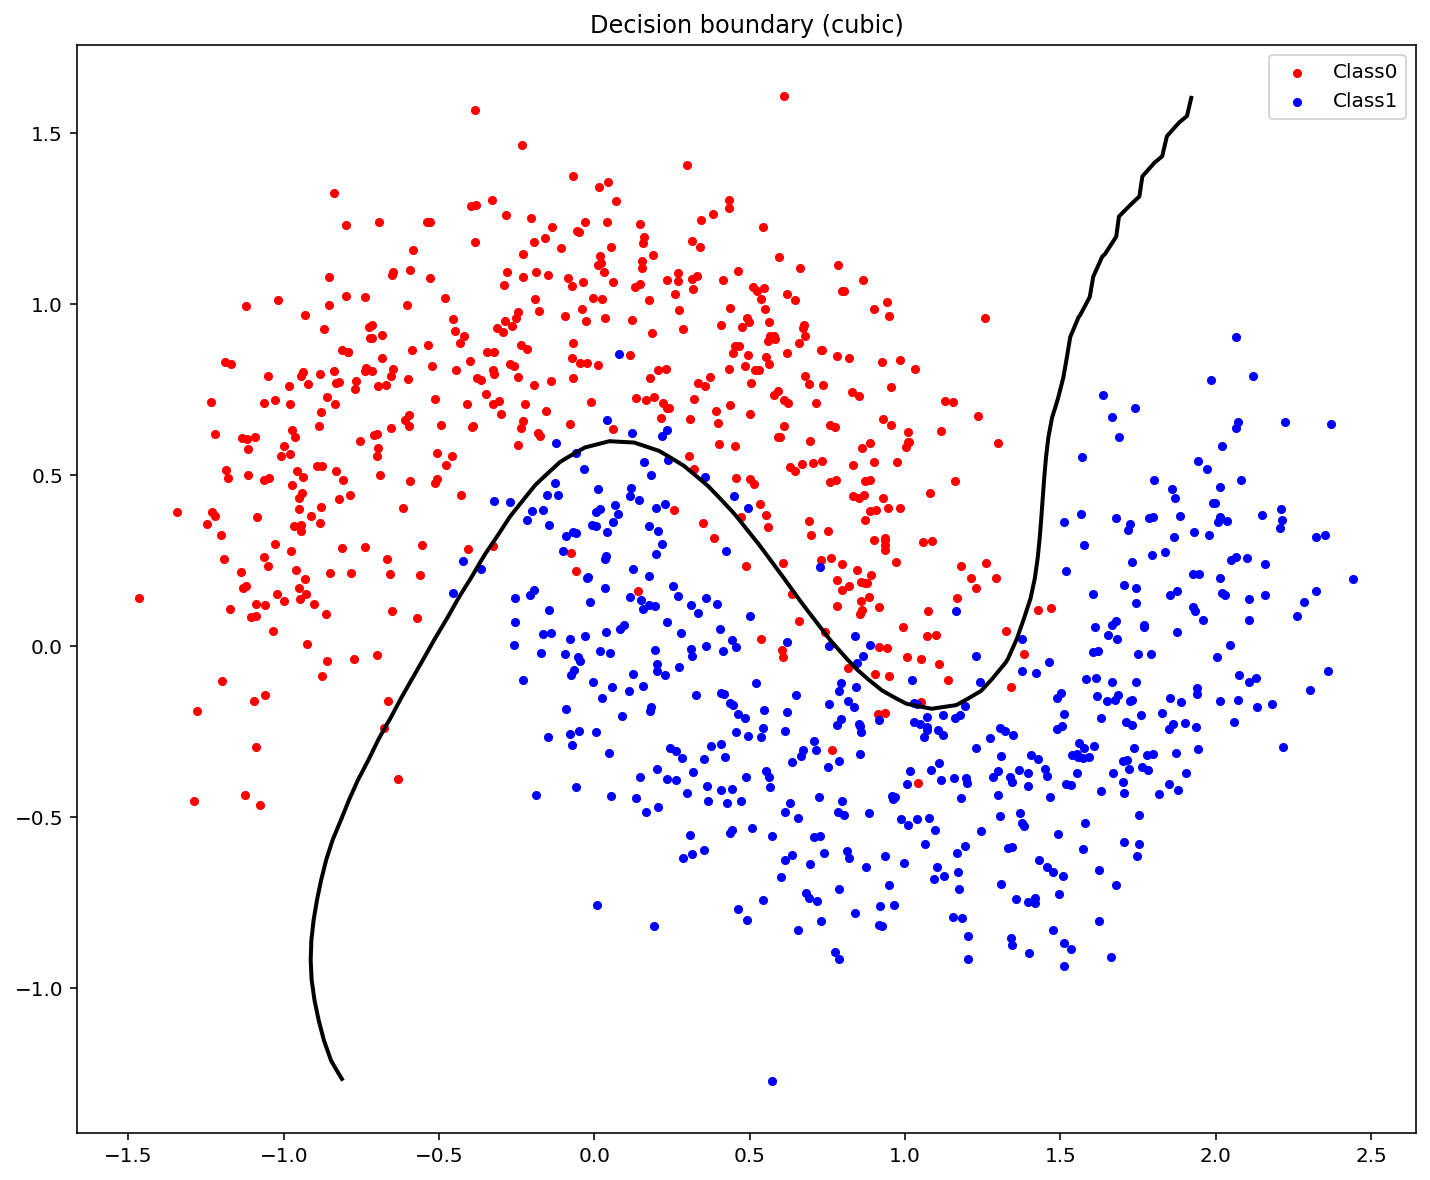

In [28]:
# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1[idx_class0],x2[idx_class0], s=50, c='r', marker='.', label='Class0') 
plt.scatter(x1[idx_class1],x2[idx_class1], s=50, c='b', marker='.', label='Class1')
plt.contour(xx1, xx2, p, levels=1, linewidths=2, colors='k')
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

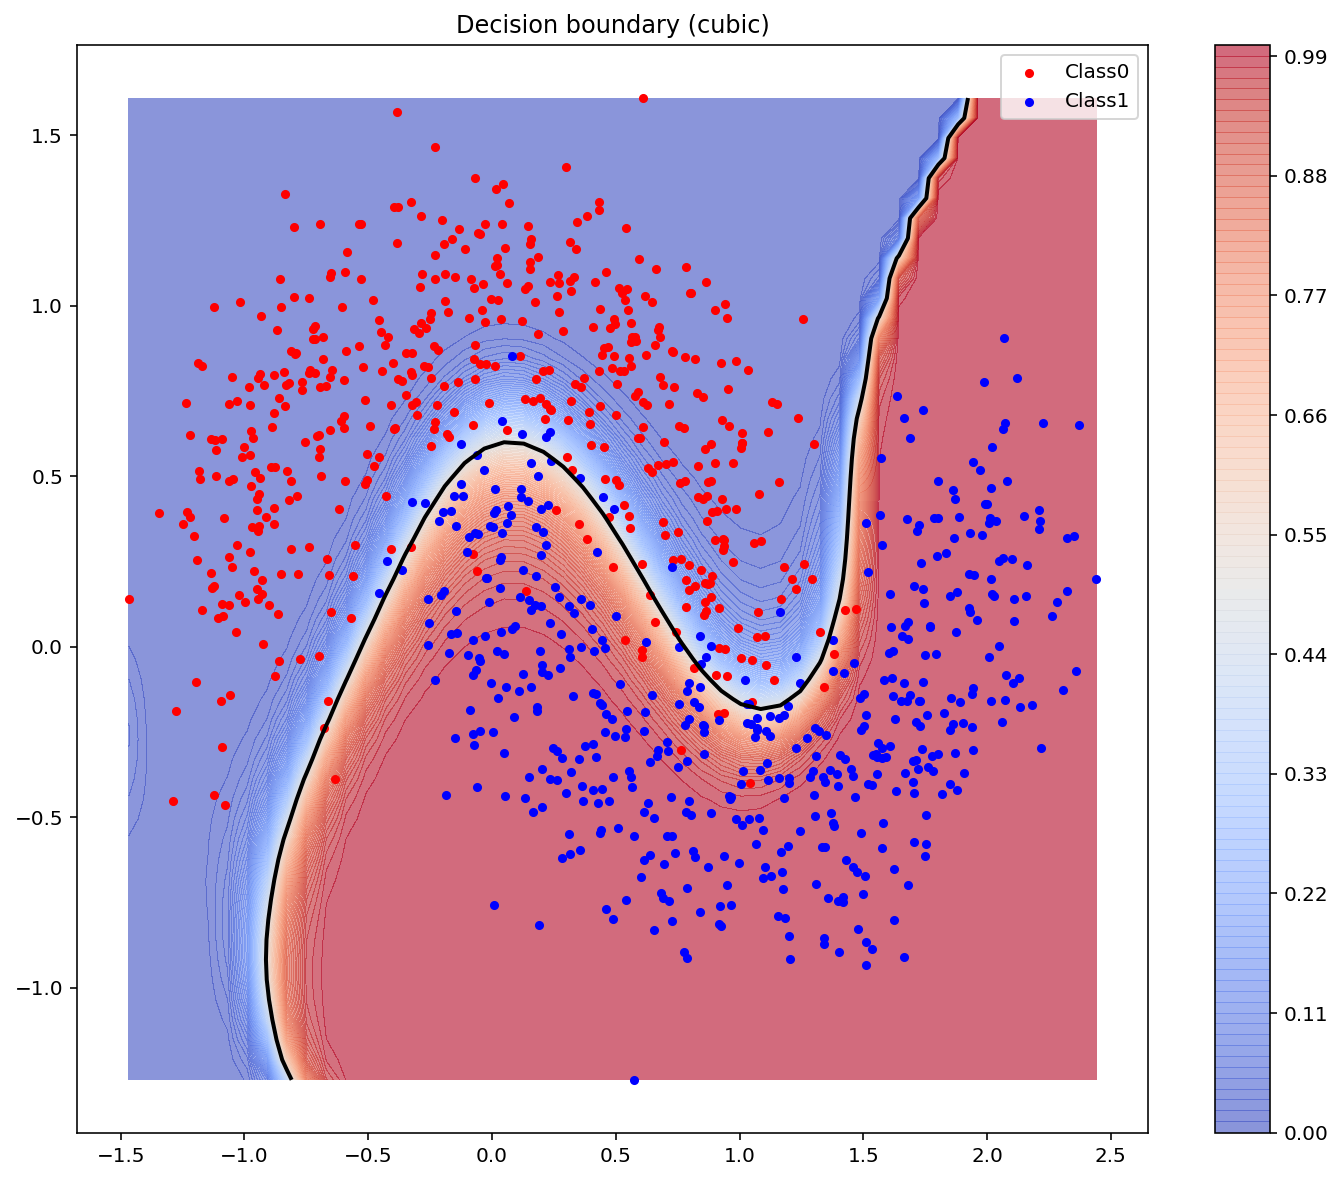

In [30]:
# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p_,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx_class0],x2[idx_class0], s=50, c='r', marker='.', label='Class0') 
plt.scatter(x1[idx_class1],x2[idx_class1], s=50, c='b', marker='.', label='Class1')
plt.contour(xx1,xx2,p_,levels=1, linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (cubic)')
plt.show()

## 5. Compute the classification accuracy [1pt]
<hr>

In [31]:

#print(np.sum(idx_wrong))
print("total number of data = ", n)
print('total number of correctly classified data = ', (n - np.sum(idx_wrong)))
print('accuracy(%) = ', ((n-np.sum(idx_wrong))/n*100) )

total number of data =  1000
total number of correctly classified data =  953
accuracy(%) =  95.3
